<a href="https://colab.research.google.com/github/kharadevaibhav/Data-Analytics-Tasks/blob/main/Air_India_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset

df = pd.read_csv('/content/drive/MyDrive/Data analytics/flight_data_DEL_BOM.csv')
df

,FlightName,FlightCode,DepartingCity,DepartingTime,ArrivingCity,ArrivingTime,Duration,Price
0,Akasa Air,QP 1719,New Delhi,09:00,Mumbai,10:55,01 h 55 m,"4,758"
1,Akasa Air,QP 1411,New Delhi,10:55,Mumbai,13:05,02 h 10 m,"4,758"
2,Akasa Air,QP 1128,New Delhi,16:00,Mumbai,18:10,02 h 10 m,"4,758"
3,IndiGo,6E 2009,New Delhi,01:00,Mumbai,03:00,02 h,"4,780"
4,IndiGo,6E 2112,New Delhi,05:30,Mumbai,07:35,02 h 05 m,"4,780"
...,...,...,...,...,...,...,...,...
95,Vistara,UK 902,Mumbai,15:45,New Delhi,18:10,02 h 25 m,"10,539"
96,Vistara,UK 910,Mumbai,17:25,New Delhi,19:35,02 h 10 m,"10,539"
97,Vistara,UK 996,Mumbai,18:30,New Delhi,20:40,02 h 10 m,"10,539"
98,Vistara,UK 950,Mumbai,21:55,New Delhi,00:10\n+ 1 DAY,02 h 15 m,"10,539"


In [ ]:
# Inspecting the DataFrame
print("\n--- DataFrame Head ---\n")
print(df.head())
print("\n--- DataFrame Info ---\n")
df.info()
print("\n--- Summary Statistics ---\n")
print(df.describe())


--- DataFrame Head ---

  FlightName FlightCode DepartingCity DepartingTime ArrivingCity ArrivingTime  \
0  Akasa Air    QP 1719     New Delhi         09:00       Mumbai        10:55   
1  Akasa Air    QP 1411     New Delhi         10:55       Mumbai        13:05   
2  Akasa Air    QP 1128     New Delhi         16:00       Mumbai        18:10   
3     IndiGo    6E 2009     New Delhi         01:00       Mumbai        03:00   
4     IndiGo    6E 2112     New Delhi         05:30       Mumbai        07:35   

    Duration  Price  
0  01 h 55 m  4,758  
1  02 h 10 m  4,758  
2  02 h 10 m  4,758  
3       02 h  4,780  
4  02 h 05 m  4,780  

--- DataFrame Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FlightName     100 non-null    object
 1   FlightCode     100 non-null    object
 2   DepartingCity  100 non-null    object
 3   Departin

In [ ]:
# Data Cleaning
# Checking null counts and percentage
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100
null_df = pd.DataFrame({'Null Count': null_counts, 'Null %': null_percentage})
print("\n--- Null Values ---\n")
print(null_df)


--- Null Values ---

               Null Count  Null %
FlightName              0     0.0
FlightCode              0     0.0
DepartingCity           0     0.0
DepartingTime           0     0.0
ArrivingCity            0     0.0
ArrivingTime            0     0.0
Duration                0     0.0
Price                   0     0.0


In [ ]:
# Drop unwanted columns

df.drop(columns='FlightCode', inplace=True)
df

,FlightName,DepartingCity,DepartingTime,ArrivingCity,ArrivingTime,Duration,Price
0,Akasa Air,New Delhi,09:00,Mumbai,10:55,01 h 55 m,"4,758"
1,Akasa Air,New Delhi,10:55,Mumbai,13:05,02 h 10 m,"4,758"
2,Akasa Air,New Delhi,16:00,Mumbai,18:10,02 h 10 m,"4,758"
3,IndiGo,New Delhi,01:00,Mumbai,03:00,02 h,"4,780"
4,IndiGo,New Delhi,05:30,Mumbai,07:35,02 h 05 m,"4,780"
...,...,...,...,...,...,...,...
95,Vistara,Mumbai,15:45,New Delhi,18:10,02 h 25 m,"10,539"
96,Vistara,Mumbai,17:25,New Delhi,19:35,02 h 10 m,"10,539"
97,Vistara,Mumbai,18:30,New Delhi,20:40,02 h 10 m,"10,539"
98,Vistara,Mumbai,21:55,New Delhi,00:10\n+ 1 DAY,02 h 15 m,"10,539"


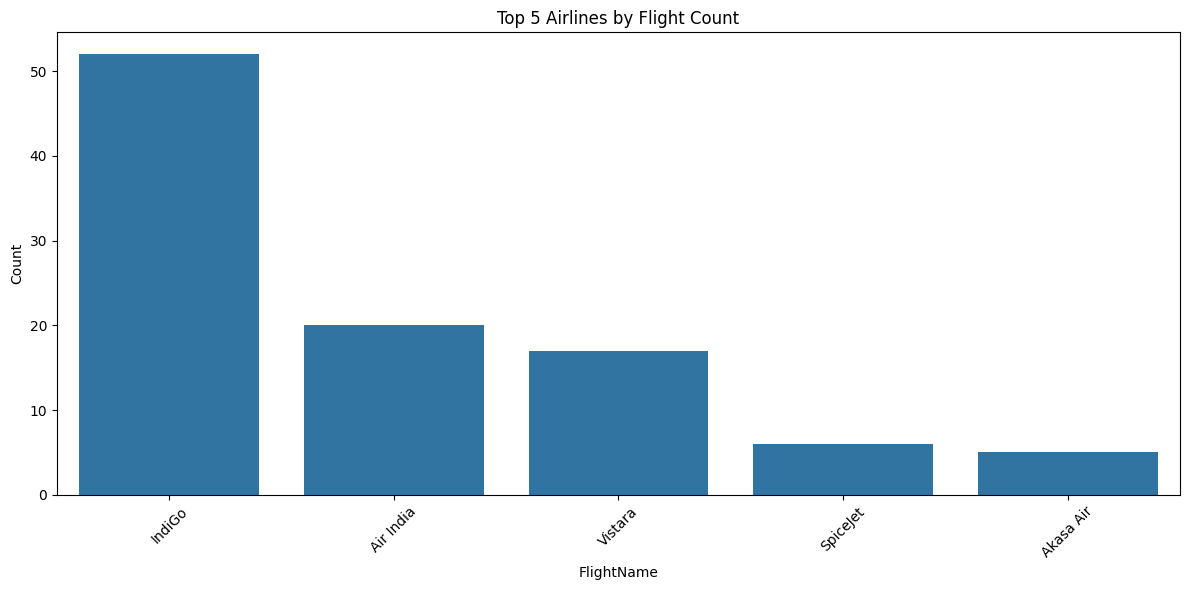

In [ ]:
if 'FlightName' in df.columns:
    plt.figure(figsize=(12, 6))
    airline_counts = df['FlightName'].value_counts().reset_index()
    airline_counts.columns = ['FlightName', 'Count']

    sns.barplot(data=airline_counts, x='FlightName', y='Count')
    plt.title('Top 5 Airlines by Flight Count')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [ ]:
# Convert 'Price' to float
if 'Price' in df.columns:
    df['Price'] = df['Price'].replace('[^0-9.]', '', regex=True)
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

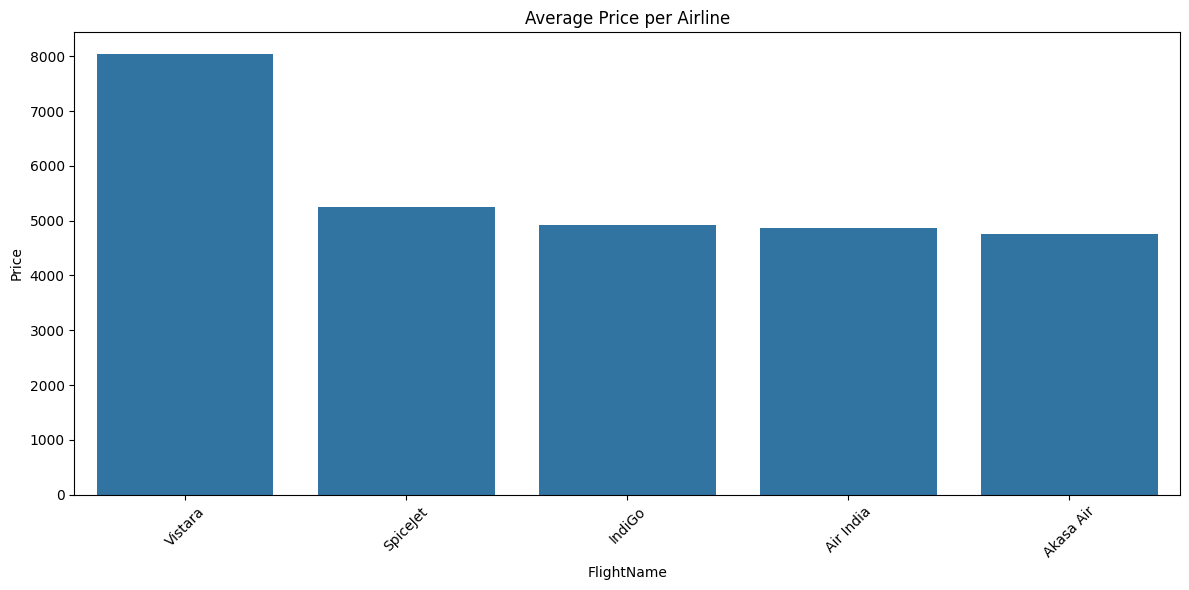

In [ ]:
# Average Price per Airline
if 'FlightName' in df.columns and 'Price' in df.columns:
    avg_price = df.groupby('FlightName')['Price'].mean().sort_values(ascending=False).reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(data=avg_price, x='FlightName', y='Price')
    plt.title('Average Price per Airline')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

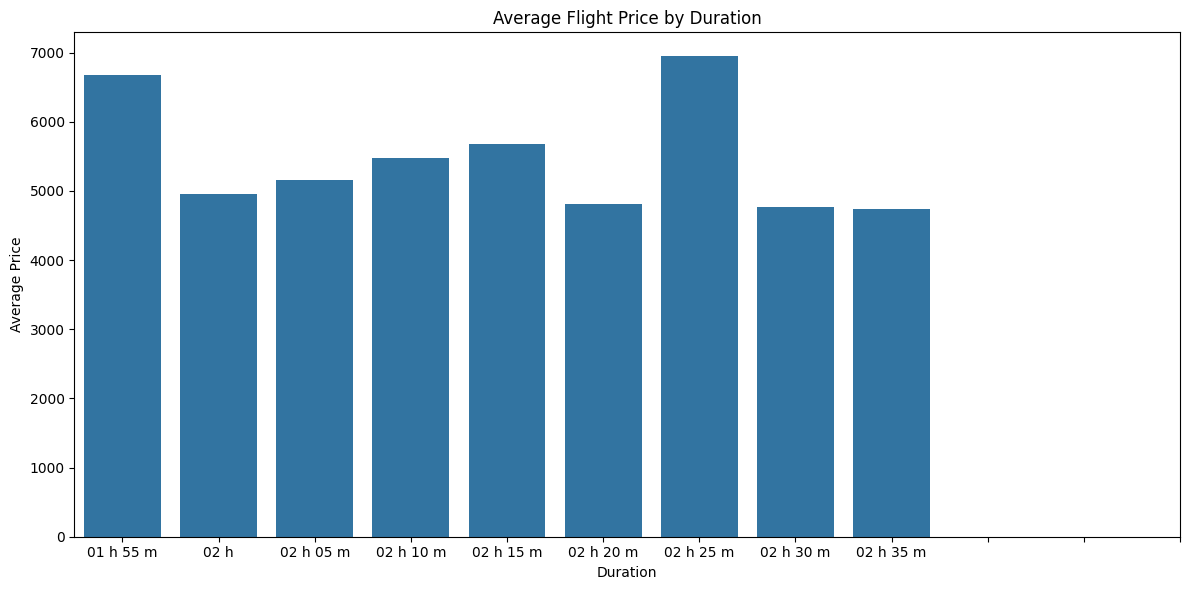

In [ ]:


# Extract the hour from 'Dep_Time'
#df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

# Group by 'Dep_Hour' and calculate average duration
avg_duration_by_hour = df.groupby('Duration')['Price'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_duration_by_hour, x='Duration', y='Price')
plt.title('Average Flight Price by Duration')
plt.xlabel('Duration')
plt.ylabel('Average Price')  # You might need to adjust the units here
plt.xticks(range(12))  # Set x-axis ticks to represent hours (0-23)
plt.tight_layout()
plt.show()

In [ ]:
# Final Outcome
print("\n--- Outcome Analysis ---\n")
print("1. Indigo Airlines operates more flights than any other airline on the Delhi to Bombay route..")
print("2. Vistara Airlines has a higher average ticket price compared to other airlines.")
print("3. Akasa Air has fewer flights than other airlines on the Delhi to Bombay route.")
print("4. Akasa Air offers the lowest average flight price among all airlines.")



--- Outcome Analysis ---

1. Indigo Airlines operates more flights than any other airline on the Delhi to Bombay route..
2. Vistara Airlines has a higher average ticket price compared to other airlines.
3. Akasa Air has fewer flights than other airlines on the Delhi to Bombay route.
4. Akasa Air offers the lowest average flight price among all airlines.
